In [32]:
import csv
import pandas as pd
import numpy as np
import math

X = pd.read_csv('participant43trial2.csv')

X=X.iloc[:,3:42]
print(X)

     L Raw X [px]  L Raw Y [px]  R Raw X [px]  ...  L GVEC Z  R GVEC X  R GVEC Y
0         1433.74        779.17       1119.51  ...     -0.98     -0.10      0.16
1         1433.98        780.22       1119.95  ...     -0.99     -0.10      0.16
2         1434.20        780.23       1119.69  ...     -0.99     -0.10      0.16
3         1434.04        780.04       1119.80  ...     -0.99     -0.10      0.16
4         1431.94        783.25       1118.08  ...     -1.00     -0.06      0.08
..            ...           ...           ...  ...       ...       ...       ...
585       1445.43        784.21       1131.46  ...     -1.00     -0.10      0.05
586       1445.72        783.93       1131.64  ...     -1.00     -0.10      0.04
587       1445.88        783.88       1131.80  ...     -1.00     -0.10      0.05
588       1446.35        783.96       1131.83  ...     -1.00     -0.09      0.05
589       1446.49        783.82       1132.30  ...     -1.00     -0.10      0.05

[590 rows x 39 columns]


In [0]:
arr=np.array([])
arr1=np.array([])
arr2=np.array([])
arr3=np.array([])
arr4=np.array([])
arr5=np.array([])
arr6=np.array([])
arr=np.append(arr,[0],axis=0)
arr1=np.append(arr1,[0],axis=0)
arr2=np.append(arr2,[0],axis=0)
arr3=np.append(arr3,[0],axis=0)
arr4=np.append(arr4,[0],axis=0)
arr5=np.append(arr5,[0],axis=0)
arr6=np.append(arr6,[0],axis=0)
for ind in range(1,len(X)):
  a=X['L POR X [px]'][ind-1]
  b=X['L POR X [px]'][ind]
  arr=np.append(arr,[abs(b-a)],axis=0)
  c=X['L POR Y [px]'][ind-1]
  d=X['L POR Y [px]'][ind]
  arr1=np.append(arr1,[abs(c-d)],axis=0)
  a1=X['R POR X [px]'][ind-1]
  b1=X['R POR X [px]'][ind]
  arr2=np.append(arr2,[abs(b1-a1)],axis=0)
  c1=X['R POR Y [px]'][ind-1]
  d1=X['R POR Y [px]'][ind]
  arr3=np.append(arr3,[abs(c1-d1)],axis=0)
  dist_l=math.sqrt((b-a)**2+(c-d)**2)
  dist_r=math.sqrt((b1-a1)**2+(c1-d1)**2)
  arr4=np.append(arr4,[dist_l],axis=0)
  arr5=np.append(arr5,[dist_r],axis=0)
  #2-fixation, 1-saccade, 0-blink
  if ind+1<len(X) and (X['L POR X [px]'][ind]==0 and X['L POR Y [px]'][ind]==0) and (X['R POR X [px]'][ind]==0 and X['R POR Y [px]'][ind]==0) and (X['L POR X [px]'][ind+1]==0 and X['L POR Y [px]'][ind+1]==0) and (X['R POR X [px]'][ind+1]==0 and X['R POR Y [px]'][ind+1]==0):
    arr6=np.append(arr6,[int(0)],axis=0) 
  elif ind+1<len(X) and (X['L POR X [px]'][ind]==0 and X['L POR Y [px]'][ind]==0) and (X['R POR X [px]'][ind]==0 and X['R POR Y [px]'][ind]==0) and (X['L POR X [px]'][ind+1]!=0 and X['L POR Y [px]'][ind+1]!=0) and (X['R POR X [px]'][ind+1]!=0 and X['R POR Y [px]'][ind+1]!=0):
    arr6=np.append(arr6,[int(1)],axis=0) 
  elif dist_l>45 or dist_r>45:
    arr6=np.append(arr6,[int(1)],axis=0)
  elif dist_l<45 or dist_r<45:
    arr6=np.append(arr6,[int(2)],axis=0)
  else:
    arr6=np.append(arr6,[int(0)],axis=0)

In [0]:
X['lxdisp']=arr
X['lydisp']=arr1
X['rxdisp']=arr2
X['rydisp']=arr3
X['L ED']=arr4
X['R ED']=arr5
X['Label']=arr6

In [35]:
X.to_csv('synthesizeddataset.csv')

X = pd.read_csv('synthesizeddataset.csv')
y=X.iloc[:,46]
print(y)
X=X.iloc[:,1:46]
print(X)

0      0.0
1      2.0
2      2.0
3      2.0
4      1.0
      ... 
585    2.0
586    2.0
587    2.0
588    2.0
589    2.0
Name: Label, Length: 590, dtype: float64
     L Raw X [px]  L Raw Y [px]  R Raw X [px]  ...  rydisp        L ED        R ED
0         1433.74        779.17       1119.51  ...    0.00    0.000000    0.000000
1         1433.98        780.22       1119.95  ...    4.80    6.371507    6.371507
2         1434.20        780.23       1119.69  ...    0.41    5.794523    5.794523
3         1434.04        780.04       1119.80  ...    0.04    3.040263    3.040263
4         1431.94        783.25       1118.08  ...  190.22  200.980255  200.980255
..            ...           ...           ...  ...     ...         ...         ...
585       1445.43        784.21       1131.46  ...    4.24    6.024616    6.024616
586       1445.72        783.93       1131.64  ...    1.67    2.039068    2.039068
587       1445.88        783.88       1131.80  ...   10.33   12.242296   12.242296
588     

In [36]:
print(X)
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

np.random.seed(10)

     L Raw X [px]  L Raw Y [px]  R Raw X [px]  ...  rydisp        L ED        R ED
0         1433.74        779.17       1119.51  ...    0.00    0.000000    0.000000
1         1433.98        780.22       1119.95  ...    4.80    6.371507    6.371507
2         1434.20        780.23       1119.69  ...    0.41    5.794523    5.794523
3         1434.04        780.04       1119.80  ...    0.04    3.040263    3.040263
4         1431.94        783.25       1118.08  ...  190.22  200.980255  200.980255
..            ...           ...           ...  ...     ...         ...         ...
585       1445.43        784.21       1131.46  ...    4.24    6.024616    6.024616
586       1445.72        783.93       1131.64  ...    1.67    2.039068    2.039068
587       1445.88        783.88       1131.80  ...   10.33   12.242296   12.242296
588       1446.35        783.96       1131.83  ...    1.59    2.738795    2.738795
589       1446.49        783.82       1132.30  ...    5.92    6.430124    6.430124

[59

In [37]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

dummy_y = np_utils.to_categorical(encoded_Y)
print(dummy_y)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,dummy_y,test_size=0.2,random_state = 4)
n_batch=len(x_test)



In [0]:
y_train.shape
#add model layers
model = Sequential()
model.add(Dense(45, input_dim=45, activation='selu'))
model.add(Dense(22, activation='selu'))
model.add(Dense(11, activation='selu'))
model.add(Dense(6, activation='selu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
#Model that calculates the thresholds without human intervention
history=model.fit(x=x_train, y=y_train, epochs=450,batch_size=32,validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose = 0)

print("Test score: ", score[0])
print("Test accuracy: ", score[1])

loss, accuracy = model.evaluate(X, dummy_y)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))


Train on 377 samples, validate on 95 samples
Epoch 1/450
377/377 [==============================] - 0s 492us/step - loss: 32.1717 - accuracy: 0.8753 - val_loss: 3.3012 - val_accuracy: 0.8211
Epoch 2/450
377/377 [==============================] - 0s 65us/step - loss: 1.2035 - accuracy: 0.7772 - val_loss: 0.3932 - val_accuracy: 0.9368
Epoch 3/450
377/377 [==============================] - 0s 62us/step - loss: 0.3183 - accuracy: 0.9390 - val_loss: 0.4001 - val_accuracy: 0.9684
Epoch 4/450
377/377 [==============================] - 0s 66us/step - loss: 0.2681 - accuracy: 0.9204 - val_loss: 0.3810 - val_accuracy: 0.9368
Epoch 5/450
377/377 [==============================] - 0s 64us/step - loss: 0.1758 - accuracy: 0.9284 - val_loss: 0.4618 - val_accuracy: 0.9368
Epoch 6/450
377/377 [==============================] - 0s 65us/step - loss: 0.1955 - accuracy: 0.9390 - val_loss: 0.3788 - val_accuracy: 0.9368
Epoch 7/450
377/377 [==============================] - 0s 64us/step - loss: 0.2059 - accu

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


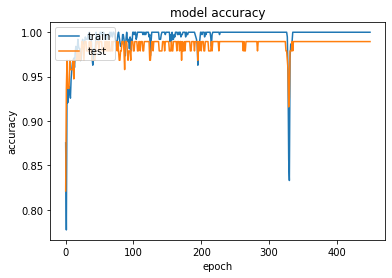

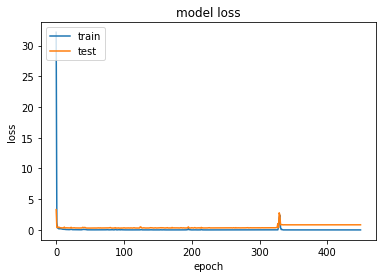

In [41]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


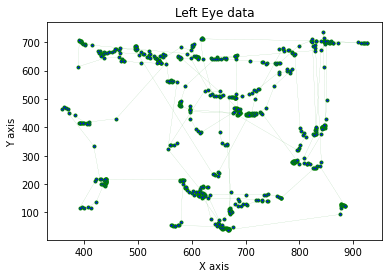

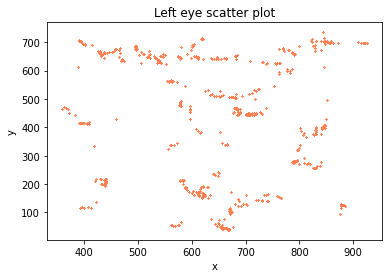

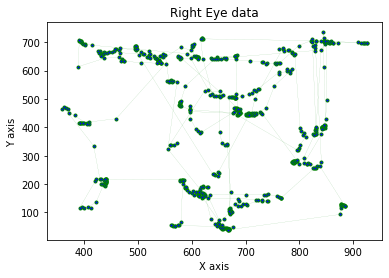

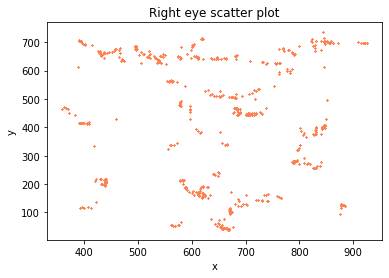

In [42]:
import matplotlib.pyplot as plt 
  
# x axis values 
x = X['L POR X [px]']
# corresponding y axis values 
y = X['L POR Y [px]']
  
# plotting the points  
plt.plot(x, y,color='green', linestyle='dashed', linewidth = 0.1, 
         marker='o', markerfacecolor='blue', markersize=3) 

# naming the x axis 
plt.xlabel('X axis') 
# naming the y axis 
plt.ylabel('Y axis') 
  
# giving a title to my graph 
plt.title('Left Eye data') 
  
# function to show the plot 
plt.show() 


plt.scatter(x, y,s=2,c='coral',marker='x')

plt.title('Left eye scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
  
m = X['R POR X [px]']
# corresponding y axis values 
n = X['R POR Y [px]'] 

# plotting the points  
plt.plot(m, n,color='green', linestyle='dashed', linewidth = 0.1, 
         marker='o', markerfacecolor='blue', markersize=3) 
  
# naming the x axis 
plt.xlabel('X axis') 
# naming the y axis 
plt.ylabel('Y axis') 
  
# giving a title to my graph 
plt.title('Right Eye data') 
  
# function to show the plot 
plt.show() 

plt.scatter(m, n,s=2, c='coral',marker='x')

plt.title('Right eye scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [43]:
import csv
myData=model.predict(X)

myFile = open('results1.csv', 'w')
heading=[['Blink','Saccade','Fixation']]
writer = csv.writer(myFile)
writer.writerows(heading)
with myFile:
    writer.writerows(myData)
     
print("Writing complete")

Writing complete


In [0]:
X = pd.read_csv('participant43trial2.csv')
lx=X['L POR X [px]']
ly=X['L POR Y [px]']
rx=X['R POR X [px]']
ry=X['R POR Y [px]']
time=X['Time']
result=np.array([]);

arr=np.array([])
X = pd.read_csv('results1.csv')
for ind in range(len(X)):
  a=X['Blink'][ind]
  b=X['Saccade'][ind]
  c=X['Fixation'][ind]
  if(a>=b and a>=c):
    result=np.append(result,["Blink"],axis=0)
  if(b>=c and b>=a):
    result=np.append(result,["Saccade"],axis=0)
  if(c>=a and c>=b):
    result=np.append(result,["Fixation"],axis=0)

df = pd.DataFrame({'Trial':'Trial001','Time': time, 'L X Coordinate': lx, 'L Y Coordinate': ly,'R X Coordinate':rx, 'R Y Coordinate': ry, 'Label':result})
df.to_csv('1stResultantcsv.csv')



In [48]:
X = pd.read_csv('results1.csv')
arr=np.array([])

#The probablistic values generated by the sequential model further labelled into 0,1,2 based on a rule based generalization
X=X.iloc[:,0:3]
for ind in range(len(X)):
  a=X['Blink'][ind]
  b=X['Saccade'][ind]
  c=X['Fixation'][ind]
  if(a>=b and a>=c):
    arr=np.append(arr,[0],axis=0)
  if(b>=c and b>=a):
    arr=np.append(arr,[1],axis=0)
  if(c>=a and c>=b):
    arr=np.append(arr,[2],axis=0)
print(arr)
print(len(arr))

[2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.

In [49]:
X = pd.read_csv('participant43trial2.csv')
X=X.iloc[:,0:40]
print(X)

# for ind in range(len(X)):
#   if(X['L Raw X [px]'][ind] == 0 and X['L Raw Y [px]'][ind] == 0 and X['R Raw X [px]'][ind] ==0 and X['R Raw Y [px]'][ind] == 0):
#     arr[ind]=0

           Time Type  Trial  ...  L GVEC X  L GVEC Y  L GVEC Z
0    4204874933  SMP      1  ...     -0.05      0.17     -0.98
1    4204908549  SMP      1  ...     -0.04      0.16     -0.99
2    4204941726  SMP      1  ...     -0.05      0.16     -0.99
3    4204975049  SMP      1  ...     -0.05      0.15     -0.99
4    4205008407  SMP      1  ...     -0.03      0.09     -1.00
..          ...  ...    ...  ...       ...       ...       ...
585  4224372907  SMP      1  ...     -0.06      0.04     -1.00
586  4224406305  SMP      1  ...     -0.06      0.04     -1.00
587  4224439620  SMP      1  ...     -0.05      0.04     -1.00
588  4224472982  SMP      1  ...     -0.06      0.04     -1.00
589  4224506281  SMP      1  ...     -0.05      0.04     -1.00

[590 rows x 40 columns]


<function matplotlib.pyplot.show>

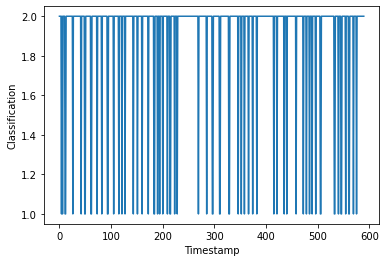

In [50]:
import matplotlib.pyplot as plt

x = list(range(len(X)))
y = arr

#The classified label plotted against corresponding timestamp
plt.plot(x,y)
plt.xlabel('Timestamp')
plt.ylabel('Classification')
plt.show

In [51]:
nof=0;
ind=0;
clusterx=np.array([]);
clustery=np.array([]);
startind=np.array([]);
endind=np.array([]);
startdurind=np.array([]);
enddurind=np.array([]);

durationarr = np.array([]);
while ind < len(arr):
  internalcount=0
  if arr[ind]==2:
    internalcount=internalcount+1
    k=1
    fixationx=X['R POR X [px]'][ind]
    fixationy=X['R POR Y [px]'][ind]
    while(ind+k < len(arr) and arr[ind+k]==2):
      internalcount=internalcount+1
      fixationx = fixationx + X['R POR X [px]'][ind+k]
      fixationy = fixationy + X['R POR Y [px]'][ind+k]
      k=k+1
    if internalcount>=1:
      nof=nof+1
      if(ind + k<len(arr)):
        duration = X['Time'][ind+internalcount-1] - X['Time'][ind]

      fixationx =fixationx/(internalcount)
      fixationy =fixationy/(internalcount)
      clusterx = np.append(clusterx,[fixationx], axis=0)
      clustery = np.append(clustery,[fixationy], axis=0)
      durationarr = np.append(durationarr, [duration], axis=0)
      startind = np.append(startind, [ind], axis=0)
      endind = np.append(endind, [ind+internalcount-1], axis=0)
      startdurind = np.append(startdurind,[X['Time'][ind]], axis=0)
      enddurind = np.append(enddurind, [X['Time'][ind+internalcount-1]], axis=0)
    ind = ind+internalcount-1
  ind=ind+1
print(nof)
print(len(durationarr))
print(len(clusterx))
for i  in range(len(clusterx)):
  print(clusterx[i], clustery[i] ,durationarr[i])


56
56
56
565.3175 339.48499999999996 100116.0
652.21 526.56 0.0
662.4200000000001 340.3175 99987.0
671.5376923076923 102.7969230769231 399527.0
695.1253333333334 514.7606666666667 466716.0
777.7099999999999 597.8733333333333 166649.0
717.1969999999999 447.963 299953.0
780.751 666.978 299982.0
803.0875 352.00625 233152.0
683.601 465.52799999999996 299967.0
662.357 647.476 300096.0
748.7122222222223 627.1555555555556 266653.0
825.876 705.1379999999999 133475.0
828.542 376.17400000000004 133423.0
791.1619999999998 279.11333333333334 466624.0
708.03 448.4371428571429 199821.0
604.8325 422.18000000000006 233231.0
687.1118181818182 449.27818181818185 333309.0
578.5870000000001 484.197 300089.0
657.2959999999999 642.574 133355.0
827.7133333333333 685.6533333333333 66657.0
829.1200000000001 257.798 133352.0
745.84375 158.0375 233474.0
623.0500000000001 164.745 99635.0
560.1842857142857 562.4771428571429 199761.0
544.67 652.9175 99987.0
487.4682499999999 653.6724999999999 1299726.0
605.82533333

In [52]:
radiusarr=np.array([])
dispersionx=np.array([])
dispersiony=np.array([])
for i in range(len(startind)):
  dist = 0;
  maximum=0;
  maxx=0;
  maxy=0
  for j in range(int(startind[i]), int(endind[i]+1)):
    dist=math.sqrt(((clusterx[i]- X['R POR X [px]'][j]) * (clusterx[i]- X['R POR X [px]'][j])) + ((clustery[i]- X['R POR Y [px]'][j]) * (clustery[i]- X['R POR Y [px]'][j])))
    distx=(clusterx[i]- X['R POR X [px]'][j])
    disty=(clustery[i]- X['R POR Y [px]'][j])
    if(dist>maximum):
      maximum=dist
    if(distx>maxx):
      maxx=distx
    if(disty>maxy):
      maxy=disty
  radiusarr= np.append(radiusarr, [maximum], axis=0)
  dispersionx= np.append(dispersionx, [maxx], axis=0)
  dispersiony= np.append(dispersiony, [maxy], axis=0)
print(radiusarr)
print(dispersionx)
print(dispersiony)

[ 7.79052509  0.          7.05240429  9.93088497 37.45232306 19.09120245
 12.34908814 20.00709437 33.43767778  6.64943494 27.17001077 17.71609758
  6.10088846  2.55628246 10.74930456  3.37056072 52.58333249  9.14020127
  9.61586907 13.13321179  5.54237214  6.58560886 45.97113872  4.01544829
  5.51240401  6.93672879 63.61391372 31.99764605 12.59510591 48.47474862
 46.86548178 12.28390978 11.68993071  9.20244533 10.53211309  8.18675748
  6.25079015 27.1419518  14.44225536 32.11289857  2.26305242 13.51019644
 10.23653163  5.80876923  6.281503    6.39590738  5.67130325  7.22702437
 29.07252724  8.05279834  2.35205894 22.60875598  5.90573992 14.55290658
  8.71624805 32.34163944]
[ 6.2175      0.          6.21        1.87769231 22.70533333 16.5
  8.337      18.001       7.5575      4.231      26.787      17.26222222
  4.976       2.502       5.552       3.25        8.4125      7.80181818
  1.637      12.826       2.56333333  3.39       45.69375     1.67
  5.47428571  3.62       61.53825    1

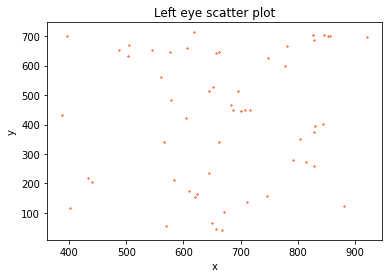

<function matplotlib.pyplot.show>

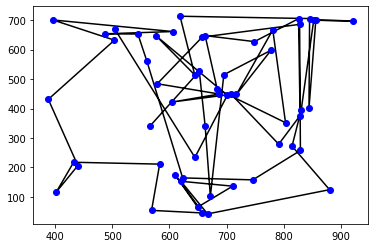

In [53]:
plt.scatter(clusterx, clustery,s=2,c='coral',marker='x')

plt.title('Left eye scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.plot(clusterx,clustery,'k')
plt.plot(clusterx,clustery,'bo')
# for i in range(len(clusterx)):
#     plt.text(clusterx[i],clustery[i])
plt.show

In [0]:
df = pd.DataFrame({'Trial':'Trial001', 'Event Start Time': startdurind, 'Event End Time': enddurind,'Event Duration':durationarr, 'Fixation Position Centroid X': clusterx, 'Fixation Position Centroid Y': clustery, 'Fixation Radius':radiusarr, 'Dispersion X':dispersionx, 'Dispersion Y':dispersiony})
df.to_csv('2ndResultantcsv.csv')

In [55]:
xreal= [565.3,
660.4,
671.5,
693.5,
772.8,
718.9,
779.7,
802.9,
683,
667.9,
748.7,
821.3,
828.9,
792.2,
710.9,
597.1,
612.6,
686.9,
580.3,
654.8,
828,
831.1,
748.1,
625.4,
561.8,
546,
445.6,
540,
606.4,
397.6,
470.7,
543.2,
403.4,
366.6,
439.2,
405.6,
430.5,
582.4,
570.1,
655.1,
610.5,
652.8,
710.5,
622.1,
666,
879.8,
818.3,
832.2,
859.9,
882.8,
844.3,
845,
619.4,
643.5,
580.7,
687.1,
704.5,
645.3,
504.9] 
yreal=[339.5,
349.1,
103.8,
514.2,
591.2,
453.8,
667.9,
356.9,
468.8,
645.8,
627.2,
702.4,
377.2,
279.9,
448.3,
457.5,
386.4,
450.2,
482.2,
642.1,
681.9,
261.2,
157.4,
164.2,
562.2,
653,
665.5,
644,
660.5,
699.7,
637.2,
625.9,
418,
463.5,
206.2,
120.7,
216.8,
211.9,
55.8,
46.6,
174.7,
77.7,
136.7,
152.8,
43.2,
122.5,
271.1,
392,
695.7,
698.6,
401.7,
709.6,
700.7,
514.5,
645.3,
464.8,
442.8,
235.6,
667.8]
len(xreal)
len(yreal)

59

<function matplotlib.pyplot.show>

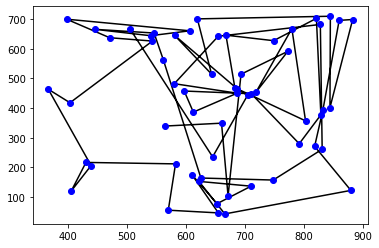

In [56]:
plt.plot(xreal,yreal,'k')
plt.plot(xreal,yreal,'bo')
# for i in range(len(clusterx)):
#     plt.text(clusterx[i],clustery[i])
plt.show